11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9053 - loss: 0.3306 - val_accuracy: 0.9690 - val_loss: 0.0993
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9742 - loss: 0.0847 - val_accuracy: 0.9751 - val_loss: 0.0789
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9843 - loss: 0.0512 - val_accuracy: 0.9783 - val_loss: 0.0689
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9892 - loss: 0.0339 - val_accuracy: 0.9794 - val_loss: 0.0688
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9923 - loss: 0.0251 - val_accuracy: 0.9806 - val_loss: 0.0675
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9942 - loss: 0.0176 - val_accuracy: 0.9811 - val_loss: 0.0652
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9947 - loss: 0.0156 - val_accuracy: 0.9805 - val_loss: 0.0680
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9957 - loss: 0

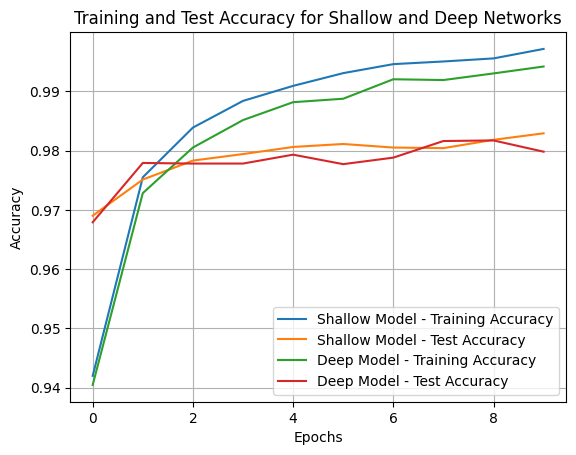

In [1]:
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 784) / 255.0
x_test = x_test.reshape(10000, 784) / 255.0

# Define a shallow model (2 layers)
model_shallow = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_shallow.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_shallow = model_shallow.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Define a deeper model (4 layers)
model_deep = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_deep.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_deep = model_deep.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plotting the accuracy
plt.plot(history_shallow.history['accuracy'], label='Shallow Model - Training Accuracy')
plt.plot(history_shallow.history['val_accuracy'], label='Shallow Model - Test Accuracy')
plt.plot(history_deep.history['accuracy'], label='Deep Model - Training Accuracy')
plt.plot(history_deep.history['val_accuracy'], label='Deep Model - Test Accuracy')

plt.title('Training and Test Accuracy for Shallow and Deep Networks')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('graph-accuracy.png')  # Save the plot as an image file
plt.show()